# Analyse Exploratoire des Données (EDA) – Employee Churn
L'objectif est de préparer le terrain en identifiant les variables pertinentes et les points de vigilance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("employee_churn.csv")

In [33]:
print(df.shape)
print(df.info())

(10000, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Employee ID                   10000 non-null  object 
 1   Age                           10000 non-null  int64  
 2   Gender                        10000 non-null  object 
 3   Education Level               10000 non-null  object 
 4   Marital Status                10000 non-null  object 
 5   Tenure                        10000 non-null  int64  
 6   Job Role                      10000 non-null  object 
 7   Department                    10000 non-null  object 
 8   Salary                        10000 non-null  int64  
 9   Work Location                 10000 non-null  object 
 10  Performance Rating            10000 non-null  int64  
 11  Projects Completed            10000 non-null  int64  
 12  Training Hours                10000 non-null  int

## Structure du jeu de données

Le jeu de données contient 10 000 observations et plusieurs variables décrivant des caractéristiques démographiques, professionnelles et comportementales des employés.

On observe :
- Des variables numériques continues (âge, salaire, heures supp ...)
- Des variables numériques discrètes et/ou ordinales (performance rating, promotions....)
- Des variables catégorielles nominales (genre, département, poste, localisation...)
- Une variable cible binaire : Churn (0 = employé retenu, 1 = employé ayant quitté l’entreprise)

Aucune valeur manquante n'est observée. 

In [51]:
df.describe()
df[['Age','Salary','Overtime Hours']].describe()

,Age,Salary,Overtime Hours
count,10000.000000,10000.0000,10000.0000
mean,40.561200,89772.7548,24.2506
std,10.876483,34469.8058,14.4787
min,22.000000,30010.0000,0.0000
25%,31.000000,59718.5000,12.0000
50%,41.000000,89243.0000,24.0000
75%,50.000000,119725.5000,37.0000
max,59.000000,149993.0000,49.0000


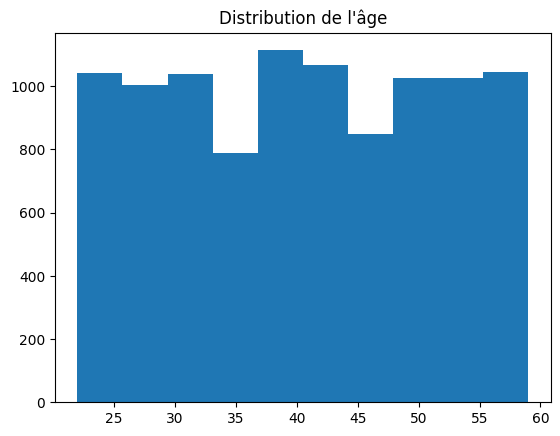

In [37]:
plt.hist(df['Age'],bins=10)
plt.title("Distribution de l'âge")
plt.show()

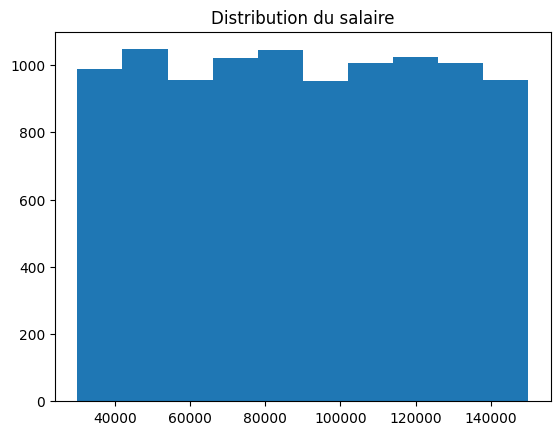

In [41]:
plt.hist(df['Salary'], bins=10)
plt.title("Distribution du salaire")
plt.show()

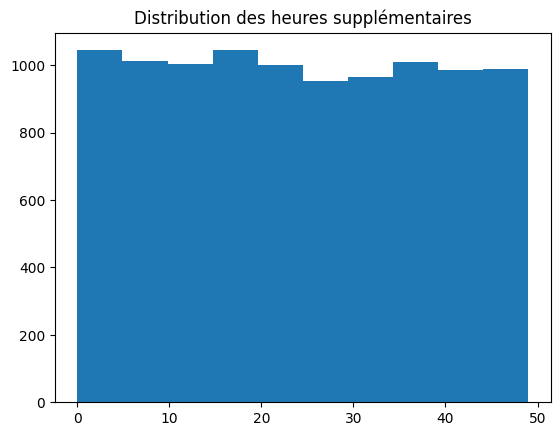

In [42]:
plt.hist(df['Overtime Hours'], bins=10)
plt.title("Distribution des heures supplémentaires")
plt.show()

## Analyse univariée – Variables numériques continues

L’analyse des variables numériques continues(âge, salaire, heures supplémentaires) montre des distributions cohérentes : 

- L’âge des employés est relativement bien réparti entre 20 et 60 ans, sans concentration excessive sur une tranche particulière
- Les salaires couvrent une plage large de valeurs, on ressent bien la diversité de niveaux hiérarchiques et de métiers
- Les heures supplémentaires sont réparties sur l’ensemble de l’intervalle, indiquant des situations variées au niveau de la charge de travail.
  
Les valeurs observées sont comprises dans des plages réalistes et ne présentent pas d’anomalies évidentes ou de valeurs aberrantes.  
Les distributions sont assez étalées, nous devrions donc avoir une diversité suffisante au niveau des profils en vue d'une future analyse.

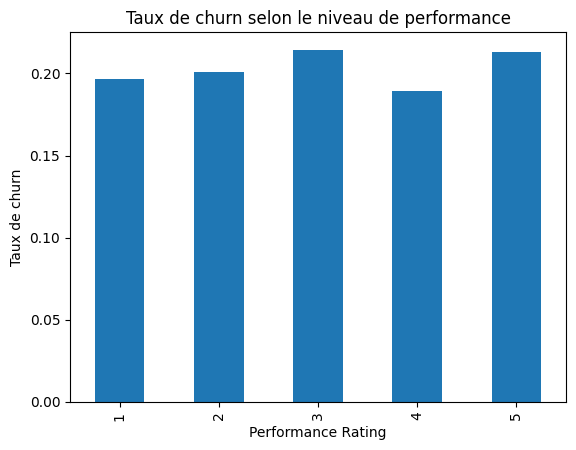

In [43]:
churn_by_perf = df.groupby("Performance Rating")["Churn"].mean()
churn_by_perf.plot.bar()
plt.title("Taux de churn selon le niveau de performance")
plt.xlabel("Performance Rating")
plt.ylabel("Taux de churn")
plt.show()

L’analyse du taux de churn selon le niveau de performance ne met pas en évidence de relation forte.
Les taux de churn restent relativement proches quel que soit le score de performance.
Cela suggère que la performance individuelle prise seule n’est pas un facteur déterminant pour le départ des employés et devra être analysée en combinaison avec d’autres variables.

C:\Users\micka\AppData\Local\Temp\ipykernel_2620\3454811808.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Satisfaction")["Churn"].mean().plot.bar()


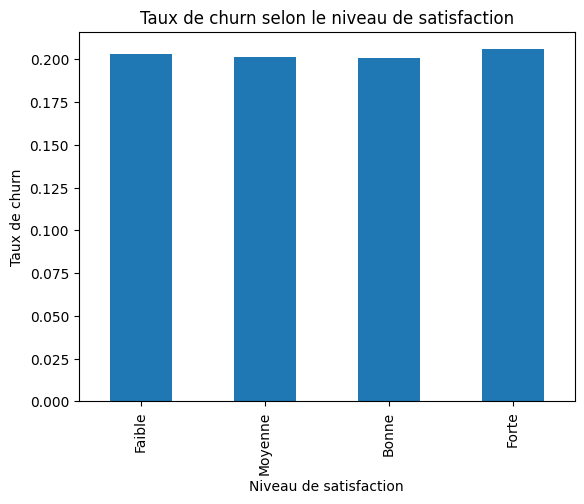

In [47]:
df['Satisfaction'] = pd.qcut(df['Satisfaction Level'],4,['Faible','Moyenne','Bonne','Forte'])
df.groupby("Satisfaction")["Churn"].mean().plot.bar()
plt.title("Taux de churn selon le niveau de satisfaction")
plt.xlabel("Niveau de satisfaction")
plt.ylabel("Taux de churn")
plt.show()

Après discrétisation du niveau de satisfaction en quatre catégories, on observe que le taux de churn reste stable quel que soit 
le niveau de satisfaction.
On en déduit que la satisfaction seule n’est pas suffisante pour expliquer le départ des employés, mais qu’elle peut jouer un rôle lorsqu’elle est combinée à d’autres facteurs, comme la charge de travail ou les heures supplémentaires.


In [49]:
df["Overtime_level"] = pd.qcut(df['Overtime Hours'],5,['Tres_faible','Faible','Modere','Important','Tres_important'])

In [50]:
pivot = pd.pivot_table(df,index='Satisfaction',values='Churn',columns='Overtime_level',aggfunc="mean")

C:\Users\micka\AppData\Local\Temp\ipykernel_2620\2457428526.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(df,index='Satisfaction',values='Churn',columns='Overtime_level',aggfunc="mean")


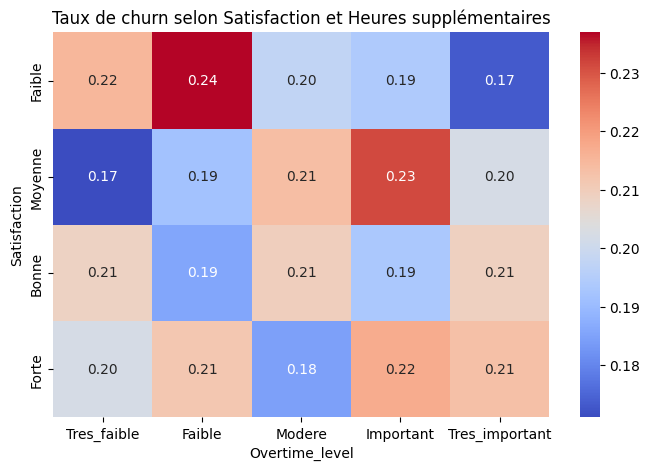

In [16]:
plt.figure(figsize=(8,5))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Taux de churn selon Satisfaction et Heures supplémentaires")
plt.show()

La heatmap met en évidence de légères variations du taux de churn selon la combinaison du niveau de satisfaction et des heures supplémentaires effectuées. Les différences restent modérées, mais certaines combinaisons présentent des taux de churn plus élevés, ce qui suggère un effet combiné de ces variables.

Dans le cadre de cette analyse exploratoire je n'ai réalisé aucun test statistique.
L’objectif ici était d’explorer les données, identifier des tendances générales et des variables potentiellement pertinentes pour la modélisation.
Les comparaisons faites ne montrent pas de différences suffisamment marquées pour justifier (à ce stade) une validation statistique qui n’aurait pas apporté d’information supplémentaire pertinente.